In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
raw_data = np.loadtxt("/content/RecordSession_2021.11.22_13.20.43.csv", delimiter = ',')


# Labeling Data

In [2]:
total_data_len = len(raw_data[0])
total_rows = len(raw_data)
print(total_data_len)
print(total_rows)

31400
8


In [3]:
data = raw_data[:, 6000:total_data_len]

In [4]:
cut_data_len = len(data[0])
print(cut_data_len)

25400


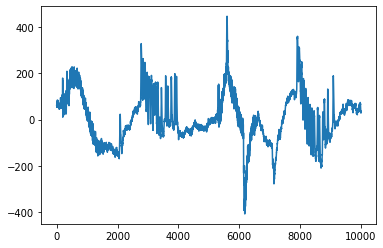

In [5]:
plt.plot(data[0, 0:10000])

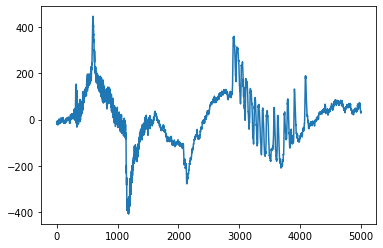

In [6]:
plt.plot(data[0, 5000:10000])

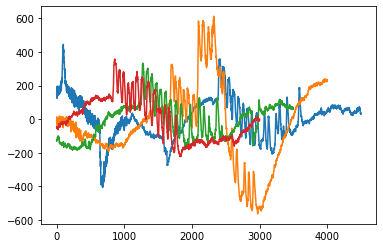

In [7]:
for i in range(10):
  plt.plot(data[0, 5500*(i+1):5000*(i+2)])

# Seeing where the jaw clenches happened


In [8]:
def plot_each_interval(row, start, end, interval):
  for i in range(10):
    #plt.figure(i)
    plt.plot(data[row, (start + i*interval):(end + i*interval)])
    #plt.ylim(-100, 200)
    #plt.xlim(0, 1308)
    plt.title("Interval " + str(i) +  ", Row " + str(row))

    

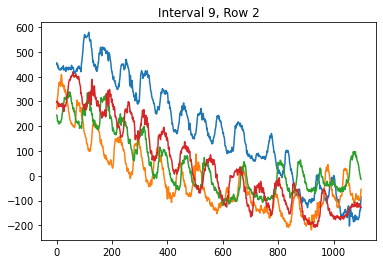

In [9]:
plot_each_interval(2, 7800, 8900, 5000)

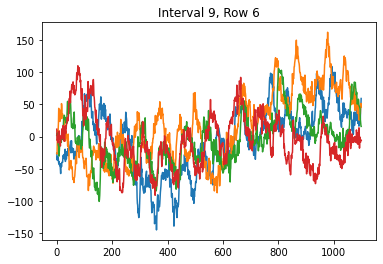

In [10]:
plot_each_interval(6, 7800, 8900, 5000)

# Filling in the truths based on the intervals with jaw clenches

In [11]:
truths = np.zeros(cut_data_len)
print(truths)
print(len(truths))

[0. 0. 0. ... 0. 0. 0.]
25400


In [12]:
def fill_truths(start, end, interval):
  #truths = np.zeros(cut_data_len)
  for i in range(4):
    for j in range(start + i*interval, end + i*interval):
      truths[j] = 1

In [13]:
fill_truths(2700, 4000, 5000)

# Visualizing the truths

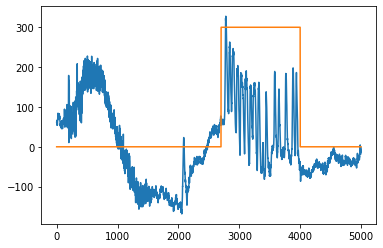

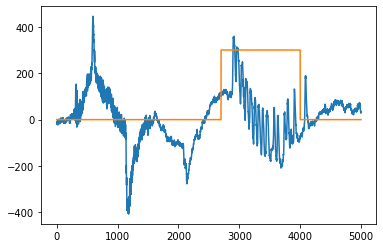

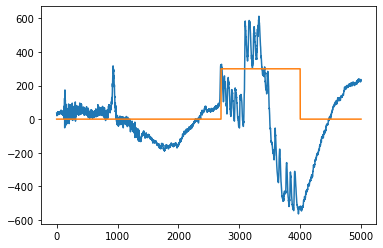

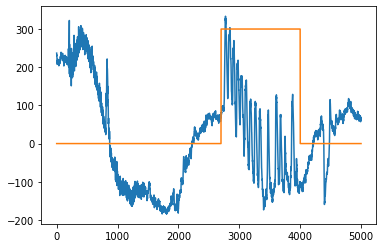

<Figure size 432x288 with 0 Axes>

In [14]:
cut = 5000
for i in range(4):
  plt.plot(data[0, i*cut:(i+1)*cut])
  plt.plot(truths[i*cut:(i+1)*cut]*300)
  plt.figure()

In [15]:
truths1 = [truths]
truth_data = np.append(data, truths1, axis=0)

In [16]:
print(truth_data)

[[ 62.      64.89    64.656  ...  59.352   58.343   60.845 ]
 [106.42   109.59   111.18   ...  -3.6635  -5.7657  -4.0566]
 [165.52   166.49   166.75   ...  27.606   21.747   24.43  ]
 ...
 [ 61.002   74.082   73.662  ... -13.488   -2.7763   5.5216]
 [ 72.369   89.364   90.105  ... -14.762    7.5606  26.207 ]
 [  0.       0.       0.     ...   0.       0.       0.    ]]


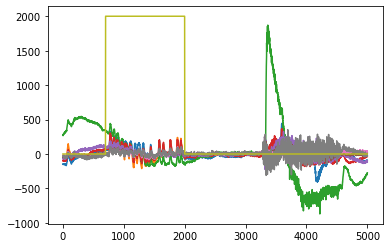

In [17]:
expanded_truths = truths*2000
expanded_truths1 = [expanded_truths]
expanded_truth_data = np.append(data, expanded_truths1, axis=0)
for i in range(len(expanded_truth_data)):
  plt.plot(expanded_truth_data[i, 2000:7000])

In [18]:
print(truth_data)

[[ 62.      64.89    64.656  ...  59.352   58.343   60.845 ]
 [106.42   109.59   111.18   ...  -3.6635  -5.7657  -4.0566]
 [165.52   166.49   166.75   ...  27.606   21.747   24.43  ]
 ...
 [ 61.002   74.082   73.662  ... -13.488   -2.7763   5.5216]
 [ 72.369   89.364   90.105  ... -14.762    7.5606  26.207 ]
 [  0.       0.       0.     ...   0.       0.       0.    ]]


# Attempting to classify using neural networks

In [19]:
# Classifier
truths_row = 8
pred_row = 0

In [20]:
# Transforming X data into kernel of a certain size


kernel_size = 200
kernel_movement = 50


new_X_length = int((len(truth_data[0]) - kernel_size)/kernel_movement)
print(new_X_length)

new_X = np.empty((0,kernel_size), int)
new_Y = np.zeros(new_X_length + 1)


#print(new_Y)
#print(new_X)


for i in range(new_X_length + 1):
  new_X_fragment = np.array([truth_data[pred_row, i*kernel_movement:i*kernel_movement+kernel_size]])
  #print(new_X_fragment)
  new_X = np.append(new_X, new_X_fragment, axis=0)
  y_average = int(np.average(truth_data[truths_row, i*kernel_movement:i*kernel_movement+kernel_size]))
  new_Y[i] = y_average

#print(new_X)
#print(new_Y)

split_cutoff = int(new_X_length/2)

504


In [21]:
# Predict on row 0

trainX = new_X[0:split_cutoff]
testX = new_X[split_cutoff:]

trainY = new_Y[0:split_cutoff]
testY = new_Y[split_cutoff:]


In [22]:
print(trainY)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Scale the training data!
scaler.fit(trainX)
scaled_trainX = scaler.transform(trainX)
scaled_testX = scaler.transform(testX)

#print("Variance: ", trainX.var(axis=0)) #every variance should be 1
#print("Mean: ", trainX.mean(axis=0)) #every mean should be 0 or very close to 0

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Initialize a neural network as described above
neural_net = MLPClassifier(hidden_layer_sizes = (5, 3), random_state = 1, max_iter = 300)
# 2 hidden layers of sizes 5 and 3.

In [25]:
neural_net.fit(scaled_trainX, trainY)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=300, random_state=1)

In [26]:
# Exercise:
# 1. Predict on the training data
trainY_pred = neural_net.predict(scaled_trainX)

# 2. Calculate the training accuracy
acc = metrics.accuracy_score(trainY, trainY_pred, normalize=True)
print(acc)

0.9563492063492064


In [27]:
testY_pred = neural_net.predict(scaled_testX)

acc = metrics.accuracy_score(testY, testY_pred, normalize=True)
print(acc)

0.83399209486166


In [28]:
print(trainY_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
print(trainY)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


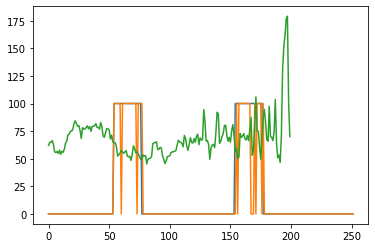

In [30]:
plt.plot(trainY*100)
plt.plot(trainY_pred*100)
plt.plot(trainX[0])

# Attempting and succeeding to classify jaw clenches based on rates of changes of the signal

In [31]:
def find_ROC(arr, p1, p2):
  return np.abs(arr[p2] - arr[p1])

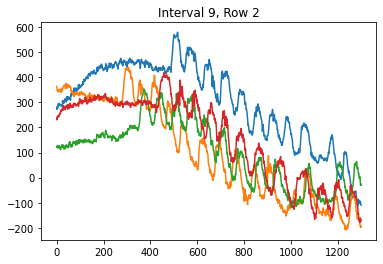

In [32]:
plot_each_interval(2, 7400, 8700, 5000)

In [33]:
find_ROC(data[0], 7400, 7402)

3.795

Jaw clench sections have higher rates of change

In [34]:
interval = 10
start = 8000
for i in range(10):
  print(find_ROC(data[0], start, start + interval))
  start += interval

55.72
55.712
113.432
48.56999999999999
14.349999999999994
44.619999999999976
100.373
36.779
46.419000000000004
33.439


Rest sections have lower rates

In [35]:
start = 800
interval = 10
for i in range(10):
  print(find_ROC(data[0], start, start + interval))
  start += interval

5.289999999999992
5.02000000000001
13.430000000000007
5.840000000000018
23.47999999999999
17.12400000000001
3.573999999999998
8.277000000000001
18.363
4.528000000000006


Predicts jaw clench based on if the ROC is high enough

In [36]:

interval = 10
cutoff = 70

def is_jaw_clench(arr, point):  
  if find_ROC(data[0], point, point + interval) > cutoff:
    return 1
  return 0


simple_predictions = np.zeros(len(data[0]))

for i in range(len(simple_predictions) - interval):
  simple_predictions[i] = is_jaw_clench(data[0], i)

acc = metrics.accuracy_score(simple_predictions, truths, normalize=True)
print(acc)

0.8224015748031496


# Spikes during clenches, sometimes false positives

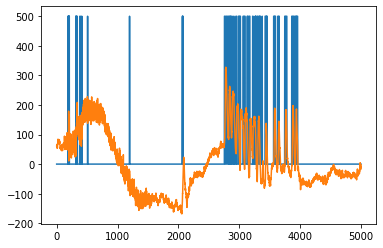

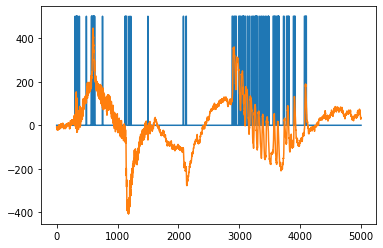

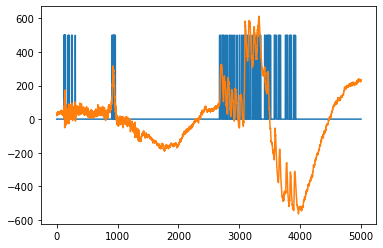

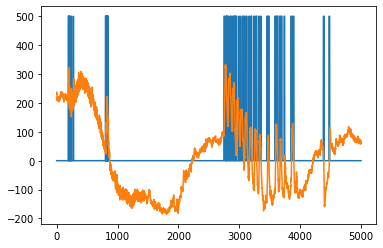

<Figure size 432x288 with 0 Axes>

In [37]:

cut = 5000
for i in range(4):
  plt.plot(simple_predictions[i*cut:(i+1)*cut]*500)
  plt.plot(data[0, i*cut:(i+1)*cut])
  plt.figure()

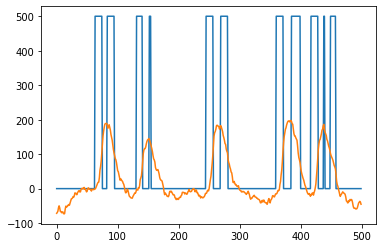

In [38]:
plt.plot(simple_predictions[3500:4000]*500)
plt.plot(data[0, 3500:4000])

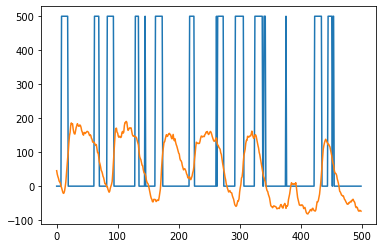

In [39]:
plt.plot(simple_predictions[3000:3500]*500)
plt.plot(data[0, 3000:3500])

# Attempting and succeeding to classify clenches if there are enough of these spikes (45 within 500 timestamps)

In [40]:
simple_predictions_2 = np.zeros(len(simple_predictions))
test_interval = 500
cutoff = 70

for i in range(test_interval, len(simple_predictions_2)):
  sum = np.sum(simple_predictions[i - test_interval:i])
  if sum >= cutoff:
    simple_predictions_2[i] = 1

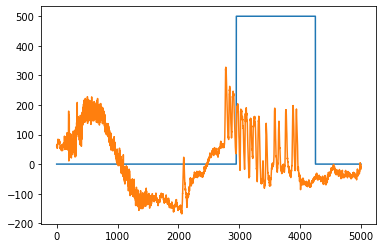

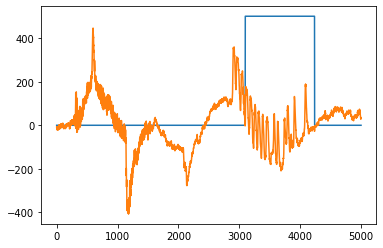

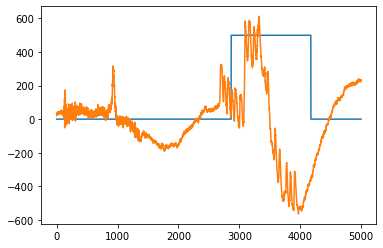

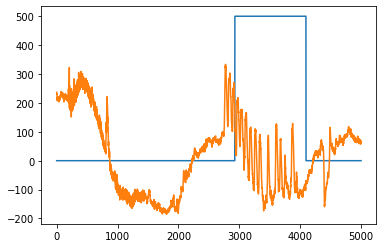

<Figure size 432x288 with 0 Axes>

In [41]:
cut = 5000
for i in range(4):
  plt.plot(simple_predictions_2[i*cut:(i+1)*cut]*500)
  plt.plot(data[0, i*cut:(i+1)*cut])
  plt.figure()

In [42]:
# truths and predictions are 87% aligned.
acc = metrics.accuracy_score(simple_predictions_2, truths, normalize=True)
print(acc)

0.8895669291338583


In [43]:
np.savetxt('truth_data.csv', truth_data, delimiter=',')

# Looking at mixed data

In [44]:
raw_mixed_data = np.loadtxt("/content/RecordSession_2021.11.22_13.38.42.csv", delimiter = ',')


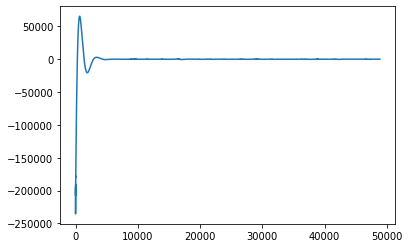

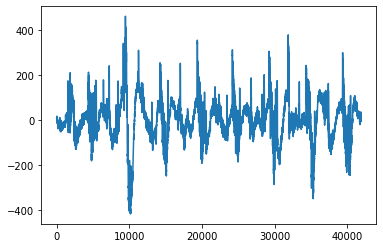

In [45]:
plt.plot(raw_mixed_data[0])
mixed_data = raw_mixed_data[:, 7000:]
plt.figure()
plt.plot(mixed_data[0])

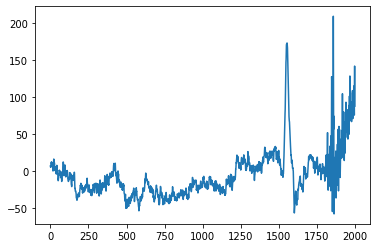

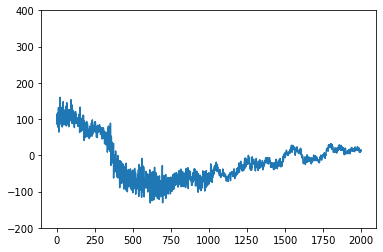

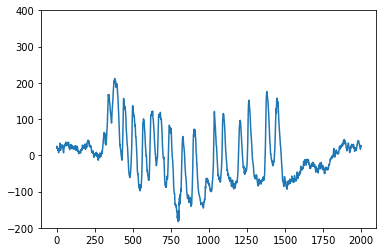

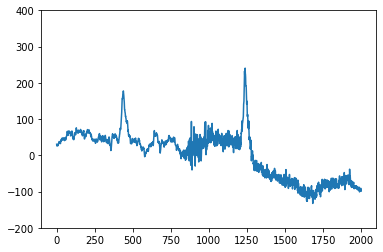

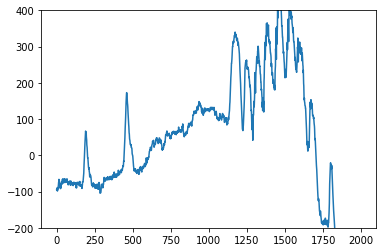

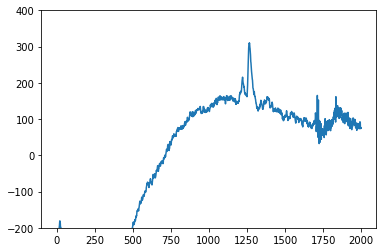

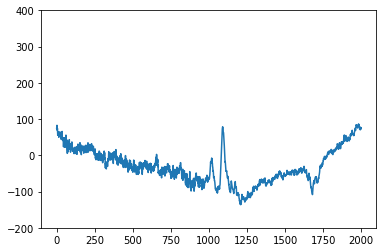

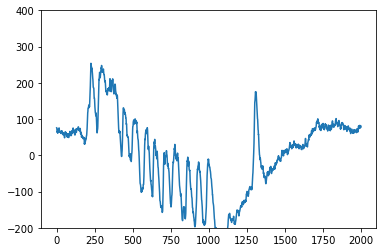

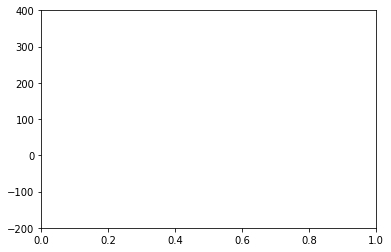

In [46]:
cut = 2000
for i in range(8):
  plt.plot(mixed_data[0, i*cut:(i+1)*cut])
  plt.figure()
  plt.ylim(-200, 400)

In [47]:
def is_jaw_clench(arr, point):  
  if find_ROC(mixed_data[0], point, point + interval) > cutoff:
    return 1
  return 0


mixed_predictions = np.zeros(len(mixed_data[0]))

for i in range(len(mixed_predictions) - interval):
  mixed_predictions[i] = is_jaw_clench(mixed_data[0], i)

mixed_predictions_2 = np.zeros(len(mixed_predictions))
test_interval = 500
cutoff = 70

for i in range(test_interval, len(mixed_predictions_2)):
  sum = np.sum(mixed_predictions[i - test_interval:i])
  if sum >= cutoff:
    mixed_predictions_2[i] = 1

# Checking predictions

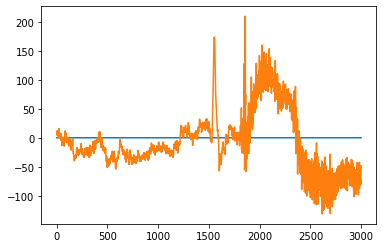

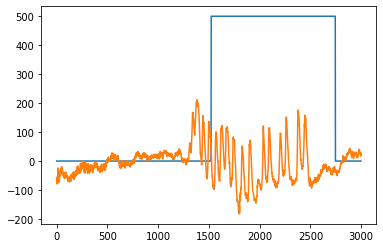

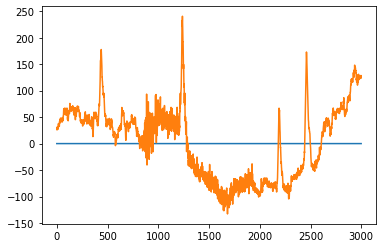

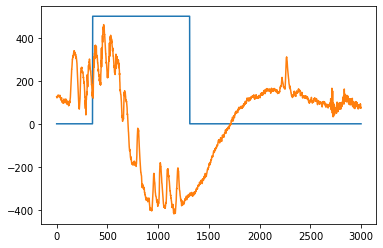

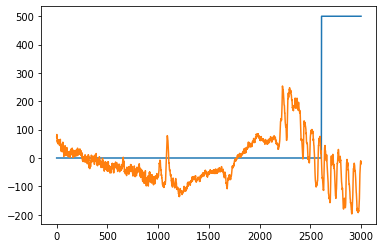

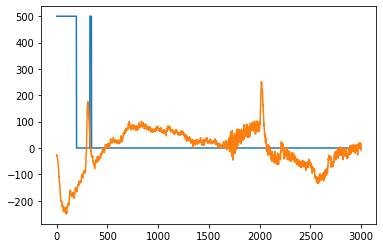

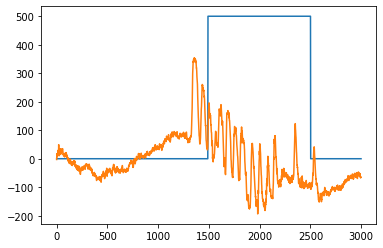

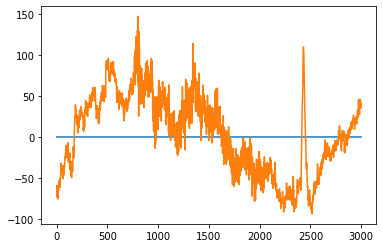

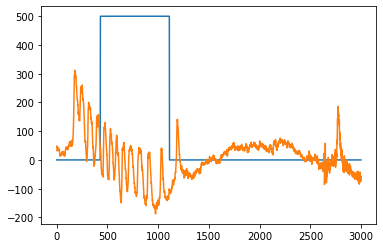

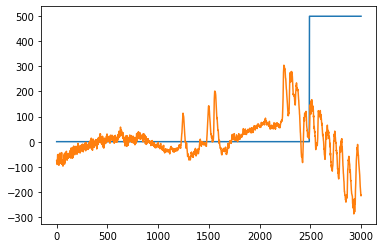

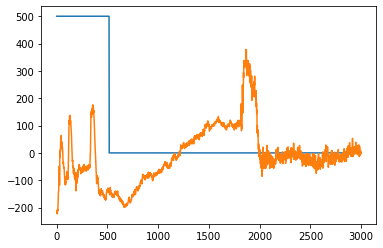

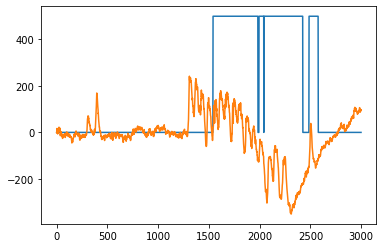

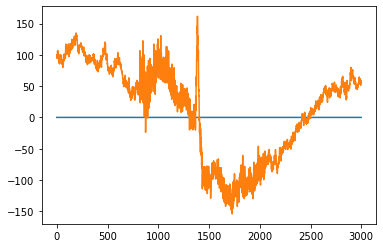

<Figure size 432x288 with 0 Axes>

In [57]:
cut = 3000
for i in range(13):
  plt.plot(mixed_predictions_2[i*cut:(i+1)*cut]*500)
  plt.plot(mixed_data[0, i*cut:(i+1)*cut])
  plt.figure()

